In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [2]:
df=pd.read_csv("censusincome.csv", na_values='?')
df

,age,workclass,finalweight,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,native country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu-num         32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hoursperweek    32561 non-null  int64 
 13  native country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
edu-num           0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hoursperweek      0
native country    0
Unnamed: 14       0
dtype: int64

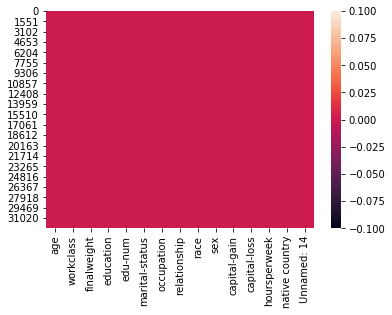

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native country', 'Unnamed: 14']

 ['age', 'finalweight', 'edu-num', 'capital-gain', 'capital-loss', 'hoursperweek']


In [7]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  6
No of categorical features:  9


In [8]:
for col in cf:
    print(df[col].value_counts()) 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [9]:
for col in nf:
    print(col,' : ',df[col].nunique())   

age  :  73
finalweight  :  21648
edu-num  :  16
capital-gain  :  119
capital-loss  :  92
hoursperweek  :  94


In [10]:
df.replace(' ?', np.nan, inplace=True)

In [11]:
for col in cf:
    print(df[col].value_counts()) 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical   

In [12]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
edu-num              0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hoursperweek         0
native country     583
Unnamed: 14          0
dtype: int64

In [13]:
#handling missing data and all three features are categorical in nature so using fillna method with most frequent.
df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace = True)
df['native country'].fillna(df['native country'].mode()[0], inplace = True)

In [14]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
edu-num           0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hoursperweek      0
native country    0
Unnamed: 14       0
dtype: int64

In [15]:
df['incomelevel']=df['Unnamed: 14']
df=df.drop(columns=['Unnamed: 14'], axis=1)

In [16]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'edu-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hoursperweek', 'native country',
       'incomelevel'],
      dtype='object')

# Statistics Summary

In [17]:
df.describe()

,age,finalweight,edu-num,capital-gain,capital-loss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
df.describe(include = ['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native country,incomelevel
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


In [19]:
# coding categorical in numeric form for further processing.
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [20]:
df.head()

,age,workclass,finalweight,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,native country,incomelevel
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


# Data visualisation

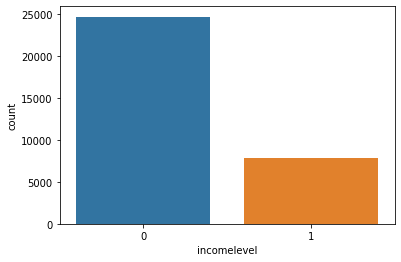

In [21]:
#univarite analysis
sns.countplot(df['incomelevel'])
plt.show()

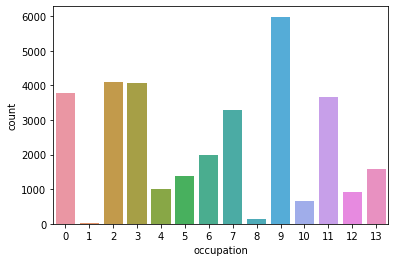

In [22]:
sns.countplot(df['occupation'])
plt.show()

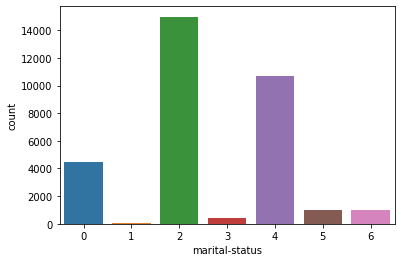

In [23]:
sns.countplot(df['marital-status'])
plt.show()

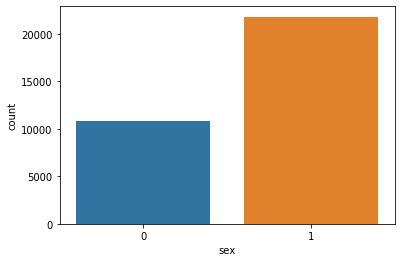

In [24]:
sns.countplot(df['sex'])
plt.show()

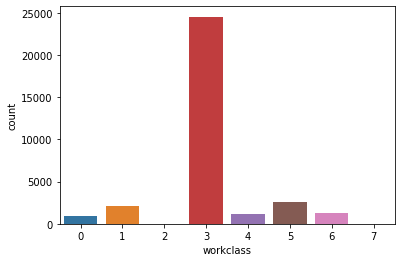

In [25]:
sns.countplot(df['workclass'])
plt.show()

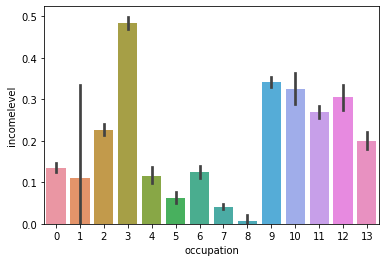

In [26]:
#bivariate analysis
sns.barplot(x='occupation',y='incomelevel',data=df) 
plt.show()

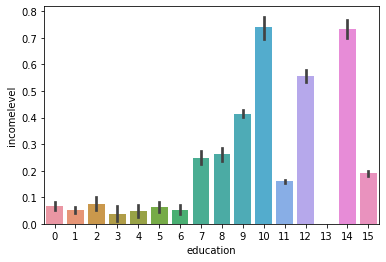

In [27]:
sns.barplot(x='education',y='incomelevel',data=df) 
plt.show()

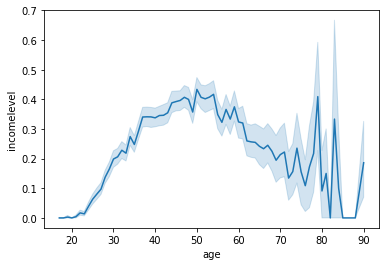

In [28]:
sns.lineplot(x='age',y='incomelevel',data=df) 
plt.show()

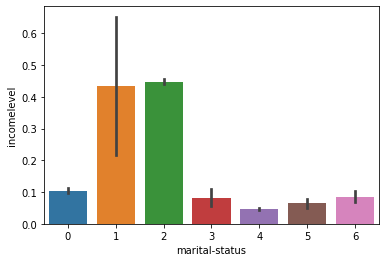

In [29]:
sns.barplot(x='marital-status',y='incomelevel',data=df) 
plt.show()

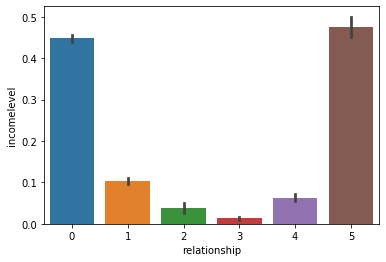

In [30]:
sns.barplot(x='relationship',y='incomelevel',data=df) 
plt.show()

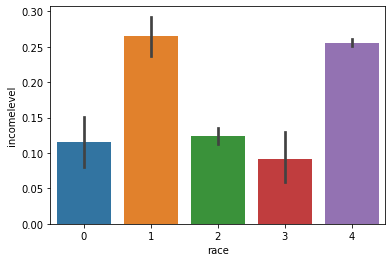

In [31]:
sns.barplot(x='race',y='incomelevel',data=df) 
plt.show()

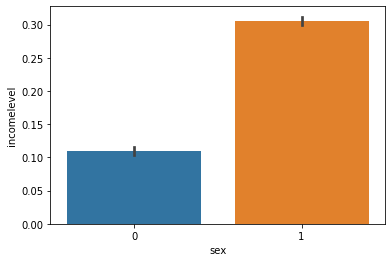

In [32]:
sns.barplot(x='sex',y='incomelevel',data=df) 
plt.show()

3    24532
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: workclass, dtype: int64

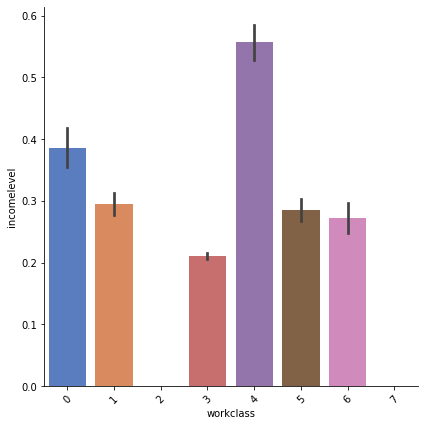

In [33]:
sns.factorplot(x="workclass", y="incomelevel", data=df, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
df['workclass'].value_counts()

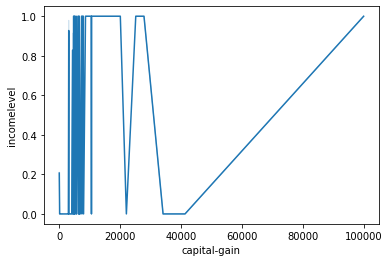

In [34]:
sns.lineplot(x='capital-gain',y='incomelevel',data=df) 
plt.show()

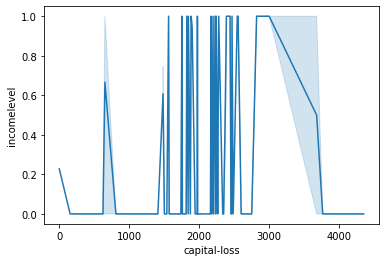

In [35]:
sns.lineplot(x='capital-loss',y='incomelevel',data=df) 
plt.show()

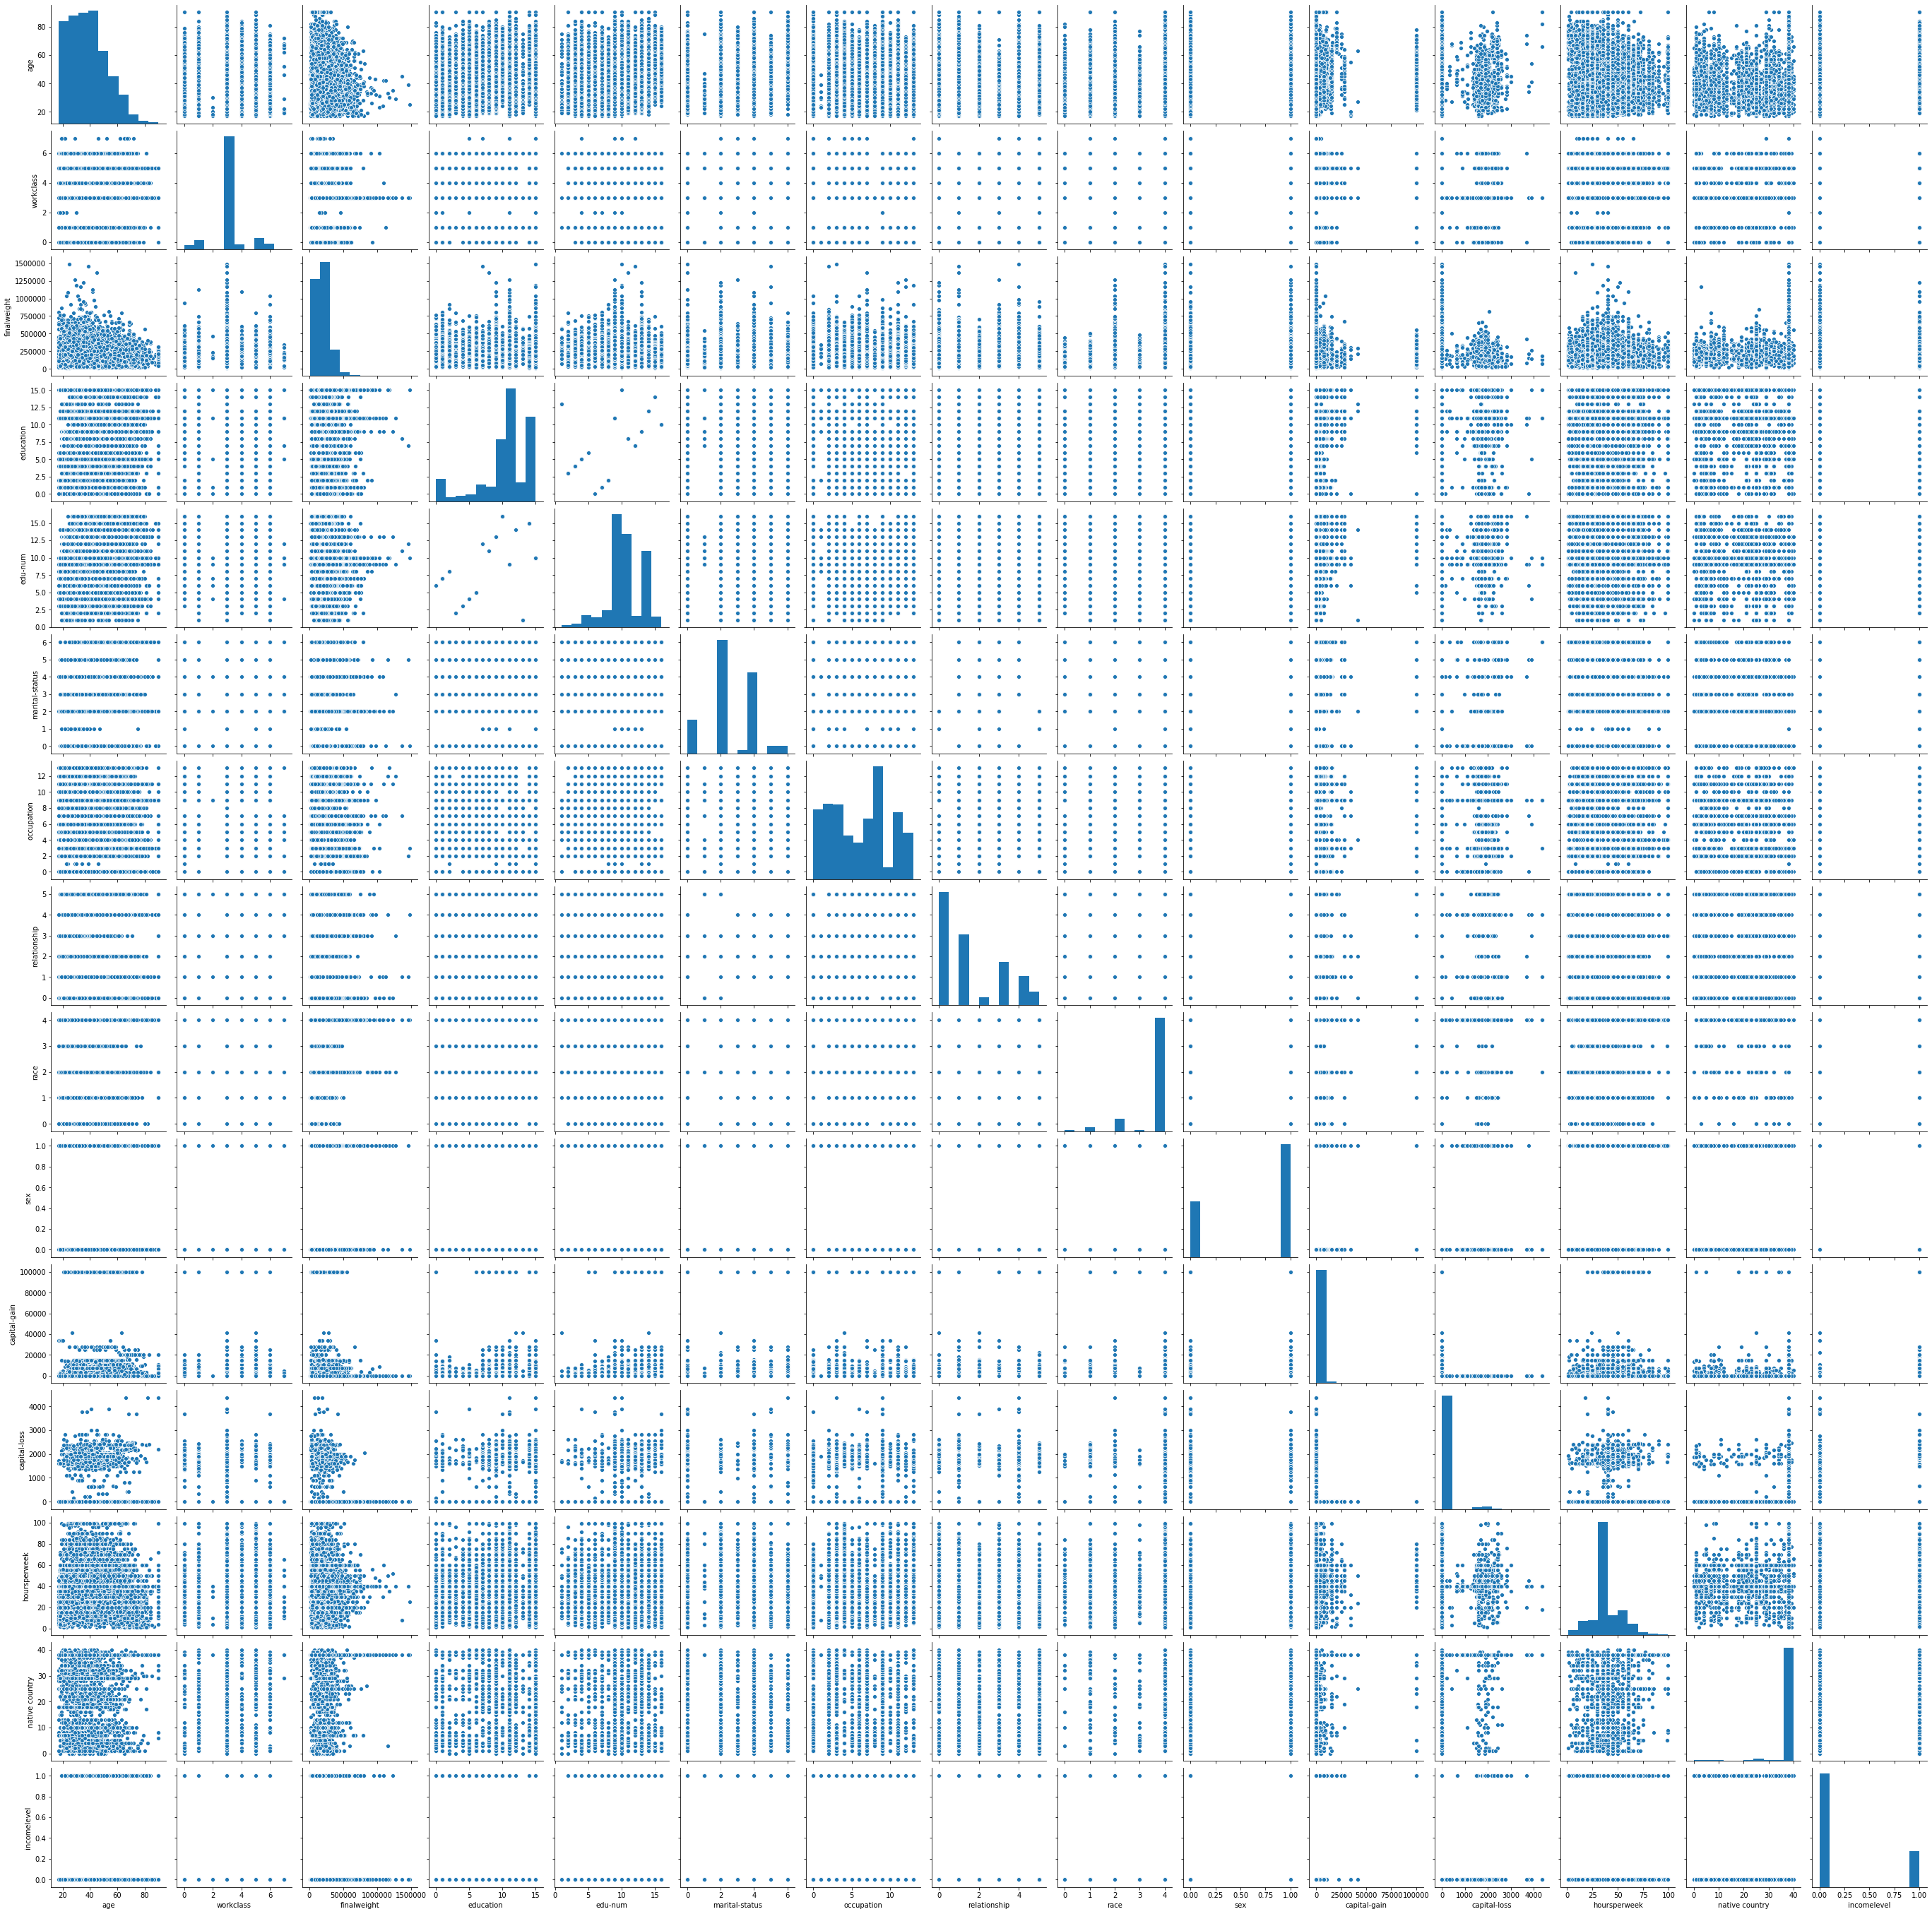

In [36]:
sns.pairplot(df)
plt.show()

In [37]:
#correlation matrix
df.corr()

,age,workclass,finalweight,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,native country,incomelevel
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
finalweight,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
edu-num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


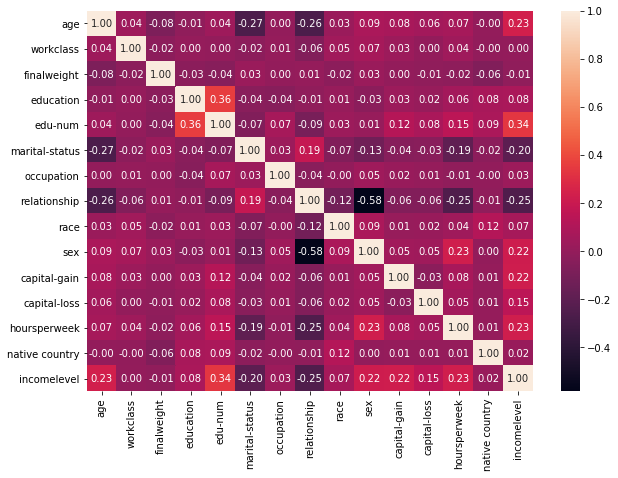

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleanning

<Figure size 720x360 with 0 Axes>

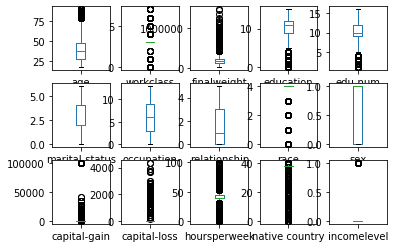

In [39]:
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(3,5)) 
plt.show()

In [40]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(32561, 15)
(27771, 15)


In [41]:
y=df['incomelevel']
dfx=df.drop(columns=['incomelevel'], axis=1)

In [42]:
dfx.skew()

age                0.484818
workclass          0.082320
finalweight        0.628021
education         -0.955731
edu-num           -0.146332
marital-status    -0.045715
occupation         0.013805
relationship       0.753709
race              -2.587110
sex               -0.689003
capital-gain       4.930572
capital-loss      29.515080
hoursperweek      -0.359848
native country    -5.405764
dtype: float64

In [43]:
# handling skewness
from scipy.stats import boxcox
for col in dfx.columns:
    if dfx.skew().loc[col]>0.55:
        dfx[col]=np.sqrt(dfx[col])

In [44]:
dfx.skew()

age                0.484818
workclass          0.082320
finalweight       -0.112613
education         -0.955731
edu-num           -0.146332
marital-status    -0.045715
occupation         0.013805
relationship       0.120979
race              -2.587110
sex               -0.689003
capital-gain       3.683774
capital-loss      26.441543
hoursperweek      -0.359848
native country    -5.405764
dtype: float64

In [45]:
dfx.head()

,age,workclass,finalweight,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,native country
0,39,6,278.416954,9,13,4,0,1.000000,4,1,46.626173,0.0,40,38
1,50,5,288.636450,9,13,2,3,0.000000,4,1,0.000000,0.0,13,38
2,38,3,464.377002,11,9,0,5,1.000000,4,1,0.000000,0.0,40,38
3,53,3,484.480134,1,7,2,5,0.000000,2,1,0.000000,0.0,40,38
5,37,3,533.462276,12,14,2,3,2.236328,4,0,0.000000,0.0,40,38


In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,age,workclass,finalweight,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hoursperweek,native country
0,0.063219,2.646979,-1.216090,-0.345104,1.212418,0.912004,-1.527444,0.123793,0.344857,0.713188,1.744363,-0.039258,0.006512,0.188398
1,0.884458,1.738886,-1.126024,-0.345104,1.212418,-0.404895,-0.776716,-1.108405,0.344857,0.713188,-0.279642,-0.039258,-2.415627,0.188398
2,-0.011439,-0.077301,0.422803,0.171075,-0.440648,-1.721795,-0.276230,0.123793,0.344857,0.713188,-0.279642,-0.039258,0.006512,0.188398
3,1.108432,-0.077301,0.599974,-2.409820,-1.267180,-0.404895,-0.276230,-1.108405,-2.958135,0.713188,-0.279642,-0.039258,0.006512,0.188398
4,-0.086097,-0.077301,1.031661,0.429164,1.625684,-0.404895,-0.776716,1.647193,0.344857,-1.402154,-0.279642,-0.039258,0.006512,0.188398


In [47]:
from sklearn import linear_model
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [48]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(18606, 14) (9165, 14)
(18606,) (9165,)


In [49]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  64  is  0.305954690798904


In [50]:
#GRID SEARCHCV
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svc = SVC()
grid = GridSearchCV( estimator=SVC(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
rbf
{'C': 10, 'kernel': 'rbf'}


In [51]:
#GRID SEARCHCV
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
11
uniform
{'n_neighbors': 11, 'weights': 'uniform'}


In [52]:
KNN=KNeighborsClassifier(n_neighbors=k,weights=w)
SV=SVC(kernel=s)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=fr_state)
GNB=GaussianNB()
XGBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [53]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', XGBC))

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


Accuracy_score =  0.8452809601745772


Cross_Val_Score =  0.8439381471736492


roc_auc_score =  0.7437622394740523


classification_report
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7149
           1       0.68      0.56      0.62      2016

    accuracy                           0.85      9165
   macro avg       0.78      0.74      0.76      9165
weighted avg       0.84      0.85      0.84      9165



[[6613  536]
 [ 882 1134]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel

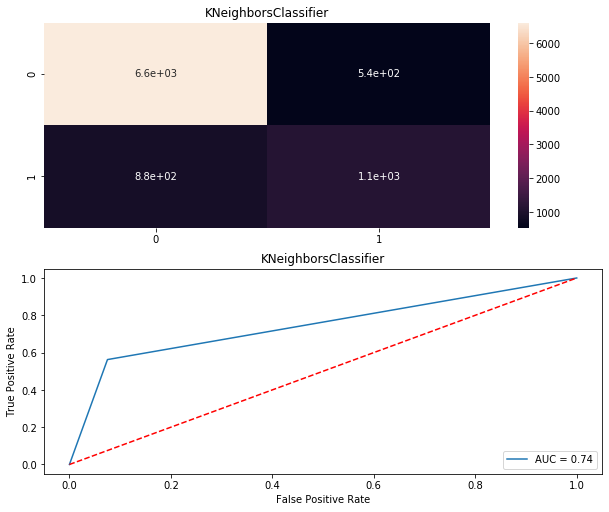

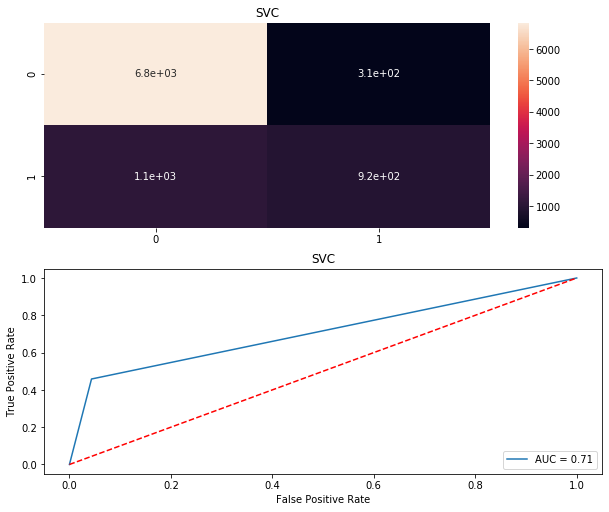

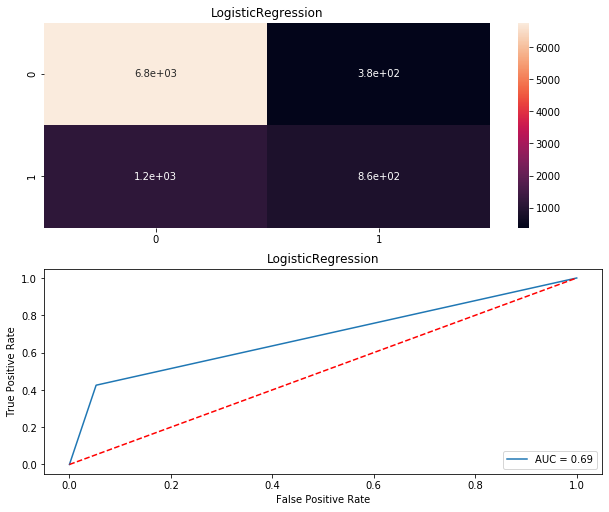

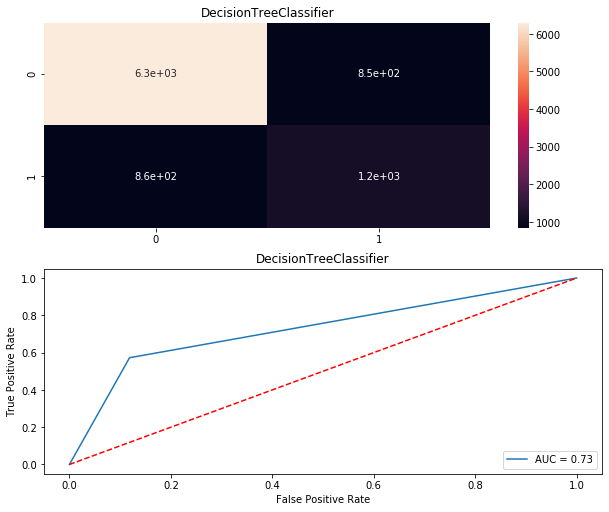

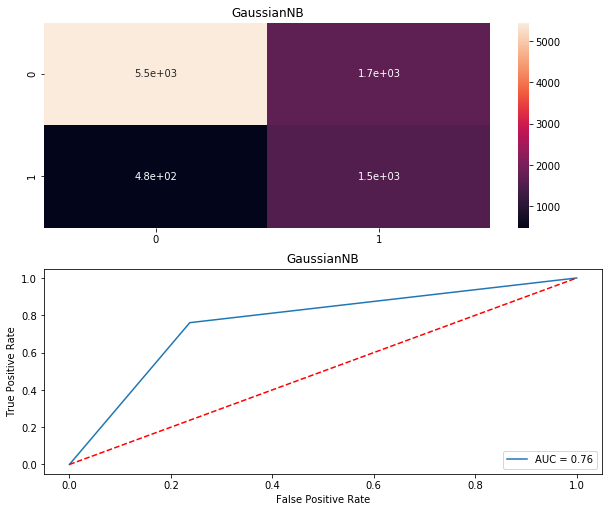

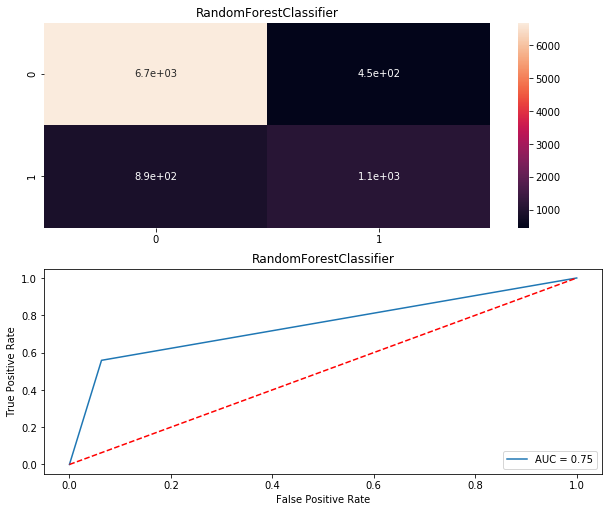

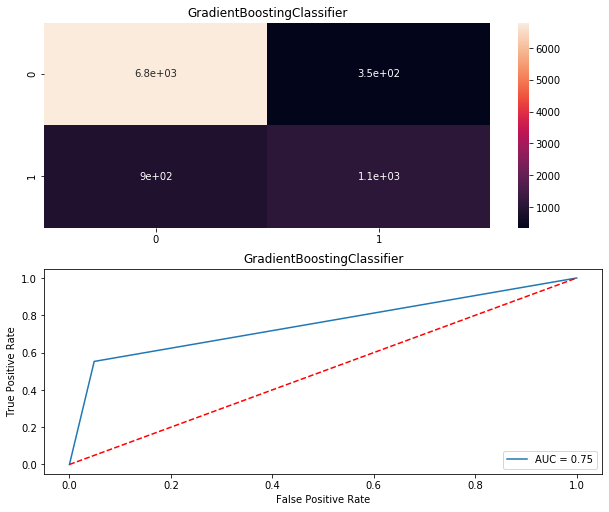

In [55]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [56]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Rou_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Rou_auc_score
0,KNeighborsClassifier,84.528096,84.393815,74.376224
1,SVC,84.691762,84.894334,70.741537
2,LogisticRegression,83.251500,83.327955,68.625222
3,DecisionTreeClassifier,81.352973,80.728106,72.697126
4,GaussianNB,76.224768,76.900378,76.159034
5,RandomForestClassifier,85.357338,85.059984,74.765306
6,GradientBoostingClassifier,86.350245,86.244666,75.188067


In [57]:
from sklearn.externals import joblib

In [58]:
joblib.dump(XGBC,'censusincome.pkl')

['censusincome.pkl']

In [59]:
model=joblib.load('censusincome.pkl')

In [60]:
model.predict(x_test.head())

array([0, 1, 0, 0, 0], dtype=int8)